# Plots without High-K

**To-do List for Figures**
- Make gif of potential gradients with all nitride changing as the applied voltage changes
    - Field plate
    - T gate
- Benchmark IV performance out to larger value (+4V) and compare on a chart
- Benchmark peak field and compare on a chart
- Show channel plot for both field plate and T gate to illustrate when and where the peak field location changes

## Definitions

In [23]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
plt.style.use('seaborn-v0_8-white') # One of the two of these styles will work. not sure why it changes.
#plt.style.use('seaborn-darkgrid')
print(plt.style.available)
import numpy as np
import pandas as pd

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [24]:
def plotFromFlooxs(IVFile, peakFile):
    
    IVFile = np.loadtxt(IVFile, delimiter=',')    
    Gate = IVFile[:,0]
    I = IVFile[:,1]

    plt.figure(figsize=[14,7]);
    plt.subplot(1,2,1)
    plt.plot(Gate, I);
    plt.title("IV")
    plt.xlabel("$V_{G} (V)$");
    plt.ylabel("$I_{DS}$ (${mA}/{cm}$)");
    plt.grid(True);

    # =============================================
    #                 Peak Field
    # =============================================
    
    peakFile = np.loadtxt(peakFile, delimiter=',')    
    Vds = peakFile[:,0]
    peakField = peakFile[:,1]

    plt.subplot(1,2,2);
    plt.plot(Vds, peakField);
    plt.title("GaN Peak Field")
    plt.xlabel("$V_{DS} (V)$");
    plt.ylabel("Electric Field (V/cm)");
    plt.grid(True);

    return Gate, I, Vds, peakField

def flooxsRead(IVFile):
    IVFile = np.loadtxt(IVFile, delimiter=',')    
    Vds = IVFile[:,0]
    I = IVFile[:,1]
    return Vds,I

## Gate voltage and Peak Field

**Nitride and HighK, GaN measurements**

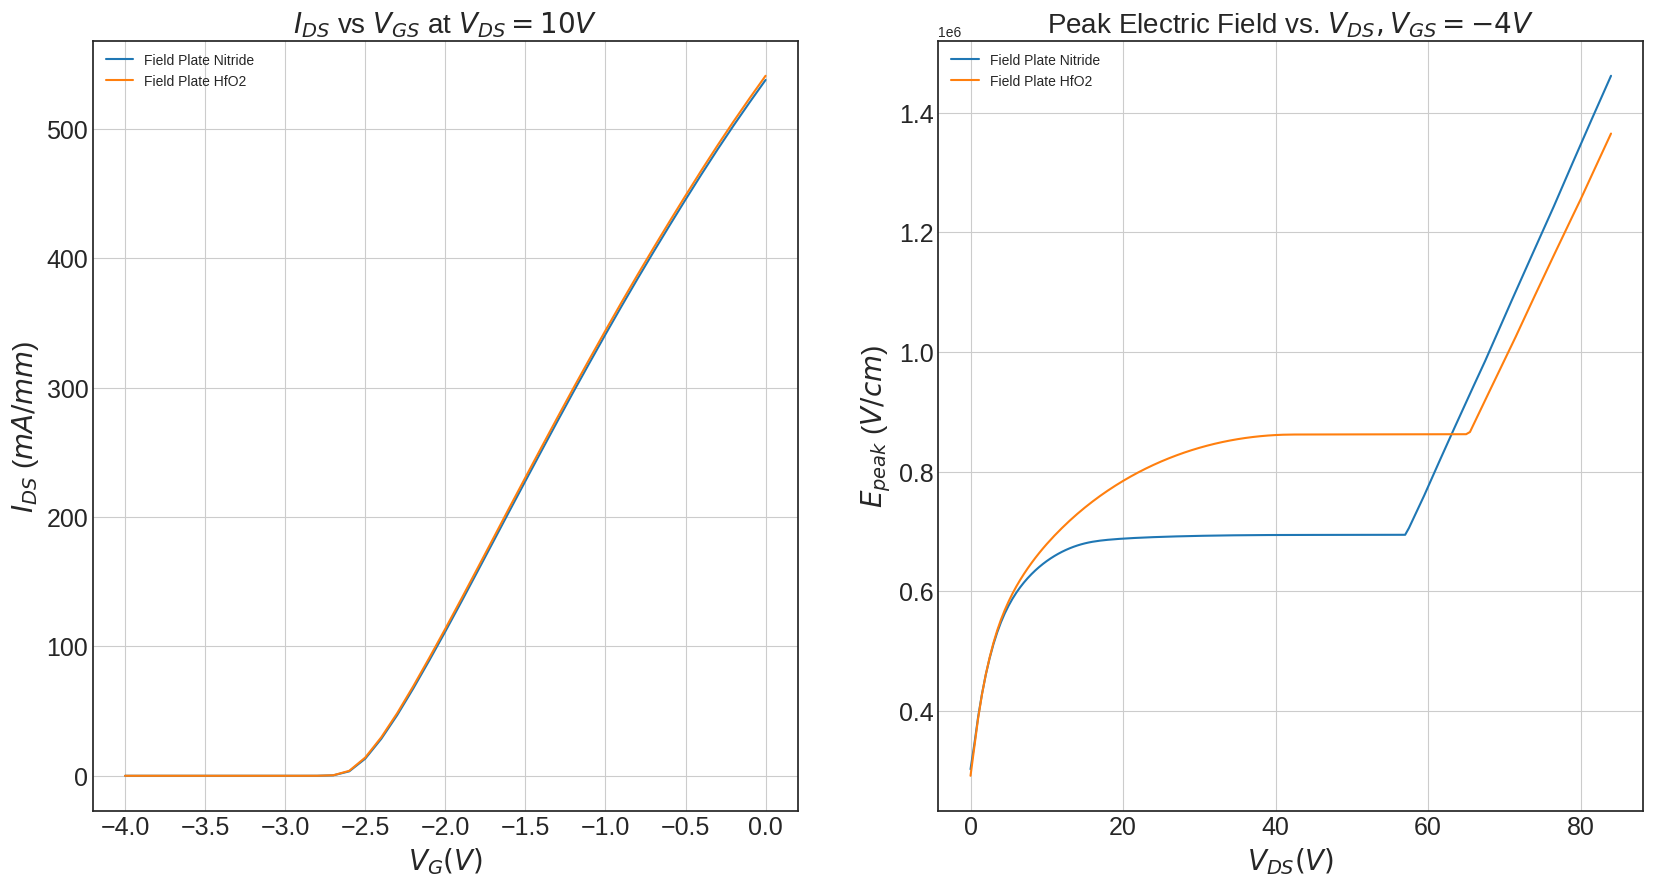

In [ ]:
fieldplate_Vgs_nitride, fieldplate_Ids_nitride = flooxsRead("/home/staffian/banjo-wombat/highK/figures/nitrideIV.csv")
fieldplate_Vgs_highk, fieldplate_Ids_highk = flooxsRead("/home/staffian/banjo-wombat/highK/figures/highkIV.csv")

#Plotting IV
plt.figure(figsize=[20,10]);
plt.subplot(1,2,1);
plt.plot(fieldplate_Vgs_nitride, 1000*fieldplate_Ids_nitride, label="Field Plate Nitride");
plt.plot(fieldplate_Vgs_highk, 1000*fieldplate_Ids_highk, label="Field Plate HfO2");
plt.title("$I_{DS}$ vs $V_{GS}$ at $V_{DS}=10V$", fontsize=20);
plt.xlabel("$V_{G} (V)$", fontsize=20);
plt.ylabel("$I_{DS}$ (${mA}/{mm}$)", fontsize=20);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True);
plt.legend();
#plt.savefig("Vt.png", dpi=300, bbox_inches='tight')

#Plotting Peak Field
fieldplate_Vds_nitride, fieldplate_peak_nitride = flooxsRead("/home/staffian/banjo-wombat/highK/figures/nitrideField_GaN.csv")
fieldplate_Vds_highk, fieldplate_peak_highk = flooxsRead("/home/staffian/banjo-wombat/highK/figures/highkField_GaN.csv")

plt.subplot(1,2,2);
plt.plot(fieldplate_Vds_nitride, fieldplate_peak_nitride, label="Field Plate Nitride");
plt.plot(fieldplate_Vds_highk, fieldplate_peak_highk, label="Field Plate HfO2");
plt.title("Peak Electric Field vs. $V_{DS}, V_{GS}=-4V$", fontsize=20);
plt.xlabel("$V_{DS} (V)$", fontsize=20);
plt.ylabel("$E_{peak}$ (${V}/{cm}$)", fontsize=20);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True);
plt.legend();
#plt.savefig("Vt.png", dpi=300, bbox_inches='tight')
plt.show()